In [10]:
!pip install transformers transformers[sentencepiece] sacrebleu diffusers accelerate -q

In [10]:
import transformers
import os
import torch
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
from diffusers import StableDiffusionPipeline

In [13]:
model_checkpoint = "facebook/mbart-large-50-many-to-many-mmt"

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

model.save_pretrained(save_directory=r'C:\Users\Agam Kapil\Desktop\Artistico\models\translator\model')
tokenizer.save_pretrained(save_directory=r'C:\Users\Agam Kapil\Desktop\Artistico\models\translator\tokenizer')

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

('C:\\Users\\Agam Kapil\\Desktop\\Artistico\\models\\translator\\tokenizer\\tokenizer_config.json',
 'C:\\Users\\Agam Kapil\\Desktop\\Artistico\\models\\translator\\tokenizer\\special_tokens_map.json',
 'C:\\Users\\Agam Kapil\\Desktop\\Artistico\\models\\translator\\tokenizer\\sentencepiece.bpe.model',
 'C:\\Users\\Agam Kapil\\Desktop\\Artistico\\models\\translator\\tokenizer\\added_tokens.json',
 'C:\\Users\\Agam Kapil\\Desktop\\Artistico\\models\\translator\\tokenizer\\tokenizer.json')

In [8]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

pipe.save_pretrained(save_directory=r'C:\Users\Agam Kapil\Desktop\Artistico\models\generator')

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


KeyboardInterrupt: 

In [12]:
model = MBartForConditionalGeneration.from_pretrained(r'C:\Users\Agam Kapil\Desktop\Artistico\models\translator\model')
tokenizer = MBart50TokenizerFast.from_pretrained(r'C:\Users\Agam Kapil\Desktop\Artistico\models\translator\tokenizer')

In [13]:
pipe = StableDiffusionPipeline.from_pretrained(r'C:\Users\Agam Kapil\Desktop\Artistico\models\generator', torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [14]:
def translator(input_text, lang):
  tokenizer.src_lang = lang
  encoded_hi = tokenizer(input_text, return_tensors="pt")
  generated_tokens = model.generate(
      **encoded_hi,
      forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
  )
  return tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)[0]

In [15]:
def generate_image(input_text, lang):
  prompt = translator(input_text, lang)
  image = pipe(prompt).images[0]
  return image

  0%|          | 0/50 [00:00<?, ?it/s]

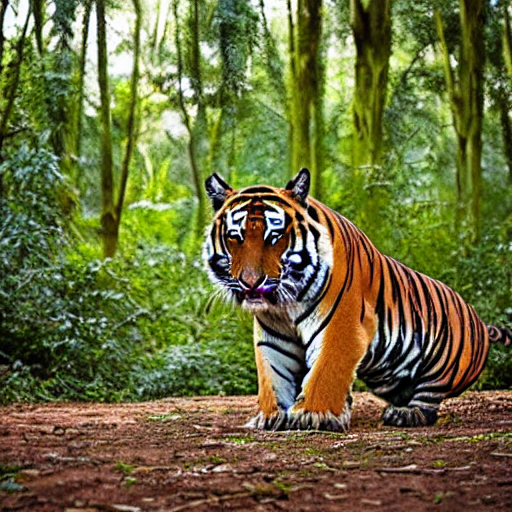

In [16]:
language = {
    'German' : 'de_DE',
    'English': 'en_XX',
    'Spanish': 'es_XX',
    'French': 'fr_XX',
    'Gujarati': 'gu_IN',
    'Hindi': 'hi_IN',
    'Japanese': 'ja_XX',
    'Dutch': 'nl_XX'
}

generate_image("जंगल में बाघ", language['Hindi'])